# Support Ventor Machine

## Optimization Objective

### Alternative view of logistic regression

$h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$

IF y = 1, we want $h_\theta(x) \approx 1,\; \theta^Tx >> 0$

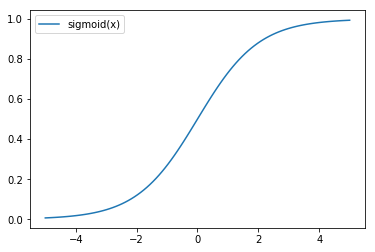

In [69]:
%matplotlib inline
import matplotlib.pyplot
import numpy as np

def f(t):
    return 1 / (1 + np.e ** (-t))

x = np.linspace(-5.0, 5.0, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), label="sigmoid(x)")
ax.legend()

### Alternative view of logistic regression
Cost of example: $
-(ylogh_\theta(x) + (1 - y)log(1 - h_\theta(x)))\\
= -ylog\frac{1}{1 + e^{-\theta^Tx}} - (1 - y)log(1 - \frac{1}{1 + e^{-\theta^Tx}})
$

/Users/kawabatayuma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/kawabatayuma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


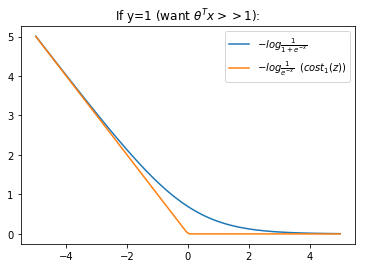

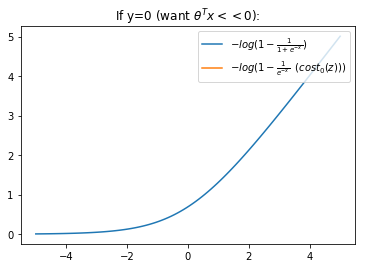

In [128]:
def logi1(t):
    return -np.log(1 / (1 + np.e ** (-t)))

def cost1(t):
    t = t * (t <= 0)
    return -np.log(1 / np.e ** (-t))

def logi2(t):
    return -np.log(1 - 1 / (1 + np.e ** (-t)))

def cost2(t):
    t = t * (t >= 0)
    return -np.log(1 - 1 / (np.e ** (-t)))

x = np.linspace(-5.0, 5.0, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("If y=1 (want $\\theta^Tx >> 1$):")
ax.plot(x, logi1(x), label="$-log\\frac{1}{1 + e^{-x}}$")
ax.plot(x, cost1(x), label="$-log\\frac{1}{e^{-x}}\\;\\;(cost_1(z))$")
ax.legend(loc="upper right")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title("If y=0 (want $\\theta^Tx << 0$):")
ax.plot(x, logi2(x), label="$-log(1 - \\frac{1}{1 + e^{-x}})$")
ax.plot(x, cost2(x), label="$-log(1- \\frac{1}{e^{-x}}\\;\\;(cost_0(z)))$")
ax.legend(loc="upper right")


### Support vector machine

<b>Logistic regression:</b><br>
$min_\theta\frac{1}{m}\bigl[\sum_{i=1}^my^{(i)}\bigl(-logh_\theta(x^{(i)})\bigr) + (1 - y^{(i)})\bigl((-log(1-h_\theta(x^{(i)})))\bigr) \bigr] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$

<b>Support vector machine:</b><br>
$min_\theta C\sum_{i=1}^my^{(i)}cost_1(\theta^Tx^{(i)}) + (1 - y^{(i)})cost_0(\theta^Tx^{(i)}) + \frac{1}{2}\sum_{j=1}^n\theta_j^2$

logistic regression: $A + \lambda B$<br>
support ventor machin: $CA + B$<br>
$C = \frac{1}{\lambda}$

### SVM hypothesis
$min_\theta C\sum_{i=1}^my^{(i)}cost_1(\theta^Tx^{(i)}) + (1 - y^{(i)})cost_0(\theta^Tx^{(i)}) + \frac{1}{2}\sum_{j=1}^n\theta_j^2$

<b>hypothesis:</b><br>
$h_\theta(x)\biggl\{
\begin{align}
&1\;\;\;if\;\theta^Tx \geq 0\\
&0\;\;\;otherwise
\end{align}
$

## Large Margin Intutuion

### Support Vencor Machine

$min_\theta C\sum_{i=1}^my^{(i)}cost_1(\theta^Tx^{(i)}) + (1 - y^{(i)})cost_0(\theta^Tx^{(i)}) + \frac{1}{2}\sum_{j=1}^n\theta_j^2$

## Mathematics Behind Large Margin Classification

Optional

## kernels I

### None-linear Decision Boundary

$
f = \theta_0+\theta_1x_1 + \theta_2x_2 + \theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2 + ... \geq 0\\
\Biggl\{\begin{align}\\
&f_1 = x_1\\
&f_2 = x_2\\
&f_3 = x_1x_2\\
&f_4 = x_1^2\\
...
\end{align}
$

Is there a different/better choice of the features $f_1, f_2, f_3, ....?$

### Kernel

Given $x$, compute new feature depending on proximity to landmarks $l^{(1)}, l^{(2)}, l^{(3)}$

Given x: <br>
$
f_1 = similarity(x, l^{(1)}) = exp(-\frac{||x-l^{(1)}||^2}{2\sigma^2})\\
f_2 = similarity(x, l^{(2)}) = exp(-\frac{||x-l^{(2)}||^2}{2\sigma^2})\\
f_3 = similarity(x, l^{(3)}) = exp(-\frac{||x-l^{(3)}||^2}{2\sigma^2})
$

### kernel and Similarity
$f_1 = similarity(x, l^{(1)}) = exp(-\frac{||x-l^{(1)}||^2}{2\sigma^2})$

<b>If $
x \approx l^{(1)}$:<br></b>
$
f_1 \approx exp(-e\frac{0^2}{2\sigma^2}) \approx 1
$ 

<b>If $x$ far from $l^{(1)}$:<br></b>
$
f_1 = exp(-\frac{(large\;number)^2}{2\sigma^2}) \approx 0
$


Predict "1" when<br>
$\theta_0 + \theta_1f_1 + \theta_2f_2 + \theta_3f_3 + ... \geq 0$

## Kernels II

### SVM with Kernels

Given $(x^{(1)}, y^{(1)}), (x^{(2)}, y{(2)}), ..., (x^{(m)}, y^{(m)})$<br>
choose $l^{(1)} = x^{(1)}, l^{(2)} = x^{(2)}, ..., l^{(m)} = x^{(m)}$<br>
Given example $x$:<br>
$\begin{align}
&f_1 = simirality(x, l^{(1)})\\
&f_2 = simirality(x, l^{(2)})
\end{align}$

$f = \begin{bmatrix}
f_0\\f_1\\f_2\\f_3\\.....\\f_n
\end{bmatrix}\;\;f_0 = 1$

For training example $(x^{(i)}, y^{(i)})$

$x^{(I)} \rightarrow \begin{matrix}
f_1 = simirality(x^{(i)}, l^{1})\\
f_2 = simirality(x^{(i)}, l^{2})\\
...\\
f_m = simirality(x^{(i)}, l^{m})
\end{matrix}$

Hypothesis: Given $x$ compute features $f \in \mathbb{R^{m + 1}}$<br>
$\rightarrow$ Predict: "y = 1" if $\theta^f \geq 0$

Training:<br>
$min_\theta C\sum_{i=1}^my^{(i)}cost_1(\theta^Tx^{(i)}) + (1 - y^{(i)})cost_0(\theta^Tx^{(i)}) + \frac{1}{2}\sum_{j=1}^n\theta_j^2$

### SVM parameters:
C($\frac{1}{\lambda}$):<br>
$\rightarrow$ Large C: Lower bias, high variance.<br>
$\rightarrow$ Small C: Higher bias, low variance.

$\sigma^2$<br>
$\rightarrow$ Large $\sigma$: Features $f_i$ vary more smoothy. High bias, lower variance<br>
$\rightarrow$ Large $\sigma$: Features $f_i$ vary less smoothy. Lower bias, higher variance

## Using An SVM

- Use SVM software package (e.g. liblinear, libsvm) to slove for parameters $\theta$
- Need to specify:
    - Choice of parameter C
    - Choice of kernel (silimarity function)
    
    
E.g. No kernel ("Linear kernel"):<br>
    predict "y=1" if $\theta^Tx\geq0$<br>
    $\rightarrow$ <u>n large, m small</u>

Gaussian kernel:<br>
    $f_i = exp(-\frac{||x - l^{(i)}||^2}{2\sigma^2})$, where $l^{(i)} = x^{(i)}$<br>
    Need choose $\sigma^2$<br>
    $\rightarrow$ <u>n small, m large</u><br>    
<u>Do perform feature scaling before using the <b>Gaussian kernel.</b></u>

### Other choice of kernel
Note: Not all sililarity functions $similarity(x, l)$ make valid kernels.<br>
(Need to satisfy technical condition called "Mercer's Theorem" to make sure SVM packages' optimizations run correctly, and do not dicerge)

Many off-the-shelf kernels available:
- Polynomial Kernel: $k(x, l) = (X^Tl)^2, \; (X^Tl + i)^n$
- MOre esoteric: String kernel, chi-square Kernel, histogram intersection kernel, ...

### Multi-class classification
when $y \in \{1, 2, 3, ..., K\}$

Many SVM packages already have built-in multi-class classification functionality.<br>
Otherwise, use one-vs-all method.(Train K SVMs, one to distinguish $y = 1$ from the rest, for $i = 1, 2, ..., K$), get $\theta^{(1)}, \theta^{(2)}, ..., \theta^{(K)}$<br>
Pick class $i$ with largest $((\theta^{(i)})^Tx)$

### Logistic regression vs SMVs

$n$ = number of features ($x \in \mathbb{R}^{n + 1}$), $m$ = number of training examples<br>

If $n$  is large(relative to $m$): <b>(E.g. $n \in m, n = 10000, m = 10 - 1000$)</b><br>
$\rightarrow$<u>Use logistic regression, or SVM without a kernel("linear kernel")</u>

If $n$ is small, $m$ is intermediate: ($n = 1-1000, m=10-10000$)<br>
$\rightarrow$<u>Use SVM with Gaussian Kernel</u>

If $n$ is small, $m$ is large: ($n = 1-1000, m=50000+$)<br>
$\rightarrow$<b>Create/add more features,</b><br> 
<u>then use logistic regression or SVM without a kernel</u>

$\rightarrow$<b><u>Neural network likely to work well for most of these setting, but may be slower to train</u><.b>

## Test

<u>Question1</u><br>
Suppose you have trained an SVM classifier with a Gaussian kernel, and it learned the following decision boundary on the training set:

[overfitting-model]

When you measure the SVM's performance on a cross validation set, it does poorly. Should you try increasing or decreasing $C$? Increasing or decreasing $\sigma^2$?

- t would be reasonable to try decreasing $C$. It would also be reasonable to try decreasing $\sigma^2$
- It would be reasonable to try increasing $C$. It would also be reasonable to try decreasing $\sigma^2$
- It would be reasonable to try increasing $C$. It would also be reasonable to try increasing $\sigma^2$
- It would be reasonable to try decreasing $C$. It would also be reasonable to try increasing $\sigma^2$

<u>Question2</u><br>
The formula for the Gaussian kernel is given by $\text{similarity}(x,l^{(1)}) = \exp{(-\frac{||x-l^{(1)}||^2}{2\sigma^2})}$
The figure below shows a plot of $f_1 = \text{similarity}(x,l^{(1)})$ when $\sigma^2 = 1$

Which of the following is a plot of $f_1$ when $\sigma^2 = 0.25σ $

- graphs

<u>Question3</u><br>
The SVM solves
$\min_\theta \space C \sum_{i=1}^m y^{(i)} \text{cost}_1(\theta^Tx^{(i)}) + (1-y^{(i)}) \text{cost}_0(\theta^Tx^{(i)}) + \sum_{j=1}^n \theta_j^2$
where the functions $\text{cost}_0(z)$ and $\text{cost}_1(z)$ look like this:

[graphs]

The first term in the objective is:<br>
$min_\theta C\sum_{i=1}^my^{(i)}cost_1(\theta^Tx^{(i)}) + (1 - y^{(i)})cost_0(\theta^Tx^{(i)})$<br>

This first term will be zero if two of the following four conditions hold true. Which are the two conditions that would guarantee that this term equals zero?
- For every example with y^{(i)} = 0, we have that $\theta^Tx^{(i)} \leq 0$
- For every example with y^{(i)} = 0, we have that $\theta^Tx^{(i)} \leq -1$ [selected]
- For every example with y^{(i)} = 1, we have that $\theta^Tx^{(i)} \geq 1$ [selected]
- For every example with y^{(i)} = 1, we have that $\theta^Tx^{(i)} \geq 0$

<u>Question4</u><br>
Suppose you have a dataset with n = 10 features and m = 5000 examples.

After training your logistic regression classifier with gradient descent, you find that it has underfit the training set and does not achieve the desired performance on the training or cross validation sets.

Which of the following might be promising steps to take? Check all that apply.
- Increase the regularization parameter $\lambda$.
- Create / add new polynomial features. [selected]
- Use an SVM with a linear kernel, without introducing new features.
- Use an SVM with a Gaussian Kernel [selected]

<u>Question5</u><br>
Which of the following statements are true? Check all that apply.

- Suppose you have 2D input examples (ie, $x^{(i)} \in \mathbb{R}^2$. The decision boundary of the SVM (with the linear kernel) is a straight line.
- If you are training multi-class SVMs with the one-vs-all method, it is not possible to use a kernel.
- The maximum value of the Gaussian kernel (i.e., $sim(x, l^{(1)}$) is 1. [selected]
- If the data are linearly separable, an SVM using a linear kernel will return the same parameters $\theta$ regardless of the chosen value of $C$ (i.e., the resulting value of $\theta$ does not depend on $C$).